In [1]:
import pandas as pd
import numpy as np

In [2]:
# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
DATA_PATH = 'C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/raw_data/'
csv_names = [
    'iMBANK_CARD_DATA_2021(K-DigitalTraining).csv', 
    'iMBANK_CARD_DATA_2022(K-DigitalTraining).csv', 
    'iMBANK_CARD_DATA_2023(K-DigitalTraining).csv', 
    'iMBANK_CUSTOMER_DATA_2021(K-DigitalTraining).csv', 
    'iMBANK_CUSTOMER_DATA_2022(K-DigitalTraining).csv', 
    'iMBANK_CUSTOMER_DATA_2023(K-DigitalTraining).csv'
    ]
datasets = {}
def read_data(csv_names):
    for i in range(len(csv_names)):
        datasets[f"data_{i+1}"] = pd.read_csv(f"{DATA_PATH}{csv_names[i]}", encoding='cp949')

        print(f'data input complete! : {csv_names[i]} as data_{i+1}')
    print('All data read complete!')

read_data(csv_names)

data input complete! : iMBANK_CARD_DATA_2021(K-DigitalTraining).csv as data_1
data input complete! : iMBANK_CARD_DATA_2022(K-DigitalTraining).csv as data_2
data input complete! : iMBANK_CARD_DATA_2023(K-DigitalTraining).csv as data_3
data input complete! : iMBANK_CUSTOMER_DATA_2021(K-DigitalTraining).csv as data_4
data input complete! : iMBANK_CUSTOMER_DATA_2022(K-DigitalTraining).csv as data_5
data input complete! : iMBANK_CUSTOMER_DATA_2023(K-DigitalTraining).csv as data_6
All data read complete!


In [7]:
# raw에서 서울/경기 결제 건수만

dat_1 = datasets['data_1']
dat_1 = dat_1[dat_1['가맹점_광역시도'].isin(['서울특별시', '경기도'])]

dat_2 = datasets['data_2']
dat_2 = dat_2[dat_2['가맹점_광역시도'].isin(['서울특별시', '경기도'])]

dat_3 = datasets['data_3']
dat_3 = dat_3[dat_3['가맹점_광역시도'].isin(['서울특별시', '경기도'])]

print(dat_1.shape, dat_2.shape, dat_3.shape)


(12477330, 7) (12959876, 7) (13399948, 7)


In [3]:
# 고객 ID로 그룹화 및 필요한 칼럼의 첫 번쨰 값(.first())만 빼오기

age_col_21 = datasets['data_4'].groupby('고객ID')[['연령대', '성별', '고객등급', '자택_시도', '자택_시군구']].first().reset_index()
age_col_22 = datasets['data_5'].groupby('고객ID')[['연령대', '성별', '고객등급', '자택_시도', '자택_시군구']].first().reset_index()
age_col_23 = datasets['data_6'].groupby('고객ID')[['연령대', '성별', '고객등급', '자택_시도', '자택_시군구']].first().reset_index()

In [8]:
# merge 진행 -> 그룹화된 customer data와 card 데이터 조인

data_21 = dat_1.merge(age_col_21, on = '고객ID', how = 'left').dropna()
data_22 = dat_2.merge(age_col_22, on = '고객ID', how = 'left').dropna()
data_23 = dat_3.merge(age_col_23, on = '고객ID', how = 'left').dropna()

In [11]:
data_21.to_csv('sampled_data/data_21.csv', index = False)
data_22.to_csv('sampled_data/data_22.csv', index = False)
data_23.to_csv('sampled_data/data_23.csv', index = False)



# 데이터 전처리 진행



In [4]:
# 터졌을 경우 실행할 것 

data_21 = pd.read_csv('sampled_data/data_21.csv')
data_22 = pd.read_csv('sampled_data/data_22.csv')
data_23 = pd.read_csv('sampled_data/data_23.csv')

In [9]:
data_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12231961 entries, 0 to 12231960
Data columns (total 14 columns):
 #   Column    Dtype         
---  ------    -----         
 0   거래년월      datetime64[ns]
 1   고객ID      int64         
 2   가맹점업종명    object        
 3   가맹점_광역시도  object        
 4   가맹점_시군구   object        
 5   승인건수      object        
 6   승인금액      int64         
 7   연령대       object        
 8   성별        object        
 9   고객등급      object        
 10  자택_시도     object        
 11  자택_시군구    object        
 12  승인건수_수치화  int64         
 13  거래년월_분기   int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(9)
memory usage: 1.2+ GB


In [6]:
# 승인건수 범주화

mapping = {
    '5번이하': 1,
    '5번초과 10번이하': 2,
    '10번초과 15번이하': 3,
    '15번초과 20번이하': 4,
    '20번 초과': 5
}

# 특정 칼럼을 수치화 해주는 함수 - 쓰려면 매핑 수정 필수적!!
def cartegory_to_int_columns(df, colname, map = mapping):
    df[f'{colname}_수치화'] = df[f'{colname}'].replace(map)
    print('수치화 완료')

cartegory_to_int_columns(data_21, '승인건수')
cartegory_to_int_columns(data_22, '승인건수')
cartegory_to_int_columns(data_23, '승인건수')

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_25280\2008942924.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f'{colname}_수치화'] = df[f'{colname}'].replace(map)


수치화 완료


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_25280\2008942924.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f'{colname}_수치화'] = df[f'{colname}'].replace(map)


수치화 완료
수치화 완료


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_25280\2008942924.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[f'{colname}_수치화'] = df[f'{colname}'].replace(map)


In [8]:
# Datetime으로 만들어주는 코드

def datetime_quater(df, colname):

    for i in colname:
        df[i] = pd.to_datetime(df[i].astype(int).astype(str), format = '%Y%m')
        df[f'{i}_분기'] = df[i].dt.quarter
        print(f'{i}의 타입은: {df[i].dtype}')
        print(f'{i}_분기 생성됨!')

datetime_quater(data_21, ['거래년월'])
datetime_quater(data_22, ['거래년월'])
datetime_quater(data_23, ['거래년월'])

거래년월의 타입은: datetime64[ns]
거래년월_분기 생성됨!
거래년월의 타입은: datetime64[ns]
거래년월_분기 생성됨!
거래년월의 타입은: datetime64[ns]
거래년월_분기 생성됨!


In [16]:
from datetime import datetime


data_21['거래월'] = data_21['거래년월'].dt.strftime("%b").str.upper()  
data_22['거래월'] = data_22['거래년월'].dt.strftime("%b").str.upper() 
data_23['거래월'] = data_23['거래년월'].dt.strftime("%b").str.upper()  

In [20]:
data_21.to_csv('sampled_data/rawdata_21.csv', index = False)
data_22.to_csv('sampled_data/rawdata_22.csv', index = False)
data_23.to_csv('sampled_data/rawdata_23.csv', index = False)

In [21]:
# 무조건 터질 거 같은데...

data_21['년도'] = 2021
data_22['년도'] = 2022
data_23['년도'] = 2023

total_data = pd.concat([data_21,data_22,data_23], axis = 0)

In [37]:
# total 기준 범주화 삽입


food_related = [
    '기타건강식품', '기타음료식품', '서양음식', '정육점', '제과점', '주점', '유흥주점', '단란주점', '일반한식', '일식·회집', '스넥', '중국식', '칵테일바', '편 의 점',
    '농,축협직영매장', '농·축·수산품', '농축수산가공품', 
]

retail_goods = [
    '가 방', '가전제품', '기타 사무용품', '기타가구', '기타의류', '기타잡화', '기타전기제품', '내의판매', '당구장', '대형할인점', 
    '목재·석재·철물', '문구용품', '세탁소', '소프트웨어', '슈퍼마켓', '스포츠·레져용품', '스포츠의류', '신 발', '안경', '액세서리', '의료용품', '일반가구', 
    '일반서적', '자동차부품', '자동차정비', '정수기', '정장', '종합용역', '주방용구', '주방용식기', '출판 및 인쇄물', '치과의원', '컴퓨터', '통신기기', '홍삼제품', 
    '화원', '화장품', 'DP&E', '기계공구', '기념품점', '사무용 OA기기', '이용원', '자동차시트·타이어', '침구·수예점', '미곡상', '비료,사료,종자', '아동의류', 
    '화방·표구점', '귀금속', '민예·공예품', '면 세 점', '인테리어전문', '조명기구', '보일러·펌프·샷시', '건축용 요업제품', '페인트', '음반영상물', '농기계', 
    '시 계', '단체복', '제 화', '농협하나로클럽'
]

service = [
    '1급 호텔', '가례서비스업', '골프경기장', '골프연습장', '공공요금대행서비스/소득공제대상', '공공요금대행서비스/소득공제비대상', '기타대인서비스', '기타레져업소', 
    '동물병원', '레져업소', '미용원', '미용재료', '보습학원', '사무서비스', '영화관', '외국어학원', '조세서비스', '종합병원', '통신서비스/소득공제비대상', '특급호텔', 
    '피부미용실', '학원', '헬스클럽', '예·체능계학원', '기능학원', '스크린골프', '한방병원', '2급 호텔', '치과병원', '혼례서비스업', '안마/스포츠마사지', 
    '종합레져타운', '기타숙박업', '기타의료기관 및 기타의료기기', '독서실', '병 원(응급실운영)', '보관및 창고업', '비씨카드 정산용(할인)', '기타 교육기관', 
    '학습지교육', '문화취미기타', '관광여행', '수족관', '초중고교육기관', '위탁급식업', '한 의 원', '콘도', '상품권전문판매', '부동산중개·임대', 
    '노 래 방', '이동통신요금', '인터넷Mall', '인터넷종합Mall', '일반(통신판매)', '통신판매업1', '티켓', '맞춤복점', '수 영 장', '약 국', '연 쇄 점', '완구점', 
    '유아원', '의 원', 'CATV홈쇼핑', 'PG상품권', '가정용품수리', '건강진단', '골프용품 전문점', '구내매점(국가기관등)', '손해보험', 'CATV', '전자상거래상품권전문판매', 
    '위성방송', '주류판매점', '애완동물', '비씨카드 정산용가맹점', '비영리/대상', '비영리/비대상', '사무·통신기기수리', '사우나', '상 품 권', '생명보험', '세차장', 
    '주차장', '볼 링 장', '자사카드발행백화점', '전문서적', '전자상거래상품권'
]

transportation = [
    'E1가스충전소', 'GS가스충전소', 'GS주유소', 'SK가스충전소', 'SK주유소', '고속버스', '렌터카', '전기차충전소', '주유소', '철도', '택시', '항공사', 
    '현대정유가스충전소', '화물운송', '쌍용S-OIL가스충전소', '여객선', 'LPG취급점', '현대정유(오일뱅크)', '쌍용S-OIL', '유류판매'
]

others = ['기타 전문점', '기타1', '기타건축자재', '기타용역서비스', '기타유통업', '업종미등록', '기타수리서비스', '기타4', '갈비전문점', '이륜차판매']

In [1]:
# 중분류

food_related = [
    '기타건강식품', '기타음료식품', '서양음식', '정육점', '제과점', '주점', '유흥주점', '단란주점', '일반한식', '일식·회집', '스넥', '중국식', '칵테일바', '편 의 점',
    '농,축협직영매장', '농·축·수산품', '농축수산가공품',  '주류판매점'
]

retail = [
    '가 방', '기타 사무용품', '기타잡화', '기타전기제품', '대형할인점', 
    '목재·석재·철물', '문구용품', '소프트웨어', '슈퍼마켓',
    '자동차부품', '종합용역', '출판 및 인쇄물', '컴퓨터', '통신기기', '홍삼제품', 
    '화원', 'DP&E', '기계공구', '기념품점', '사무용 OA기기', '미곡상', '비료,사료,종자',  
    '화방·표구점', '민예·공예품', '면 세 점', '인테리어전문', '조명기구', '보일러·펌프·샷시', '건축용 요업제품', '페인트', '음반영상물', '농기계', 
    '시 계', '단체복', '제 화', '농협하나로클럽','아동의류', '연 쇄 점', '완구점'
]

life = [
    '가전제품', '기타가구', '기타의류', '신 발', '안경', '액세서리', '일반가구',
    '일반서적', '내의판매', '세탁소', '화장품', '침구·수예점', '신 발', '안경', '귀금속','정수기', '정장',
    '주방용구', '주방용식기'
]

med = [
    '의료용품', '치과의원', '종합병원', '한방병원', '치과병원', '기타의료기관 및 기타의료기기','병 원(응급실운영)',
    '한 의 원', '약 국',  '의 원', '건강진단', '동물병원'
]

online = [
    '인터넷Mall', '인터넷종합Mall', 'CATV홈쇼핑','CATV'
]

education = [
    '학원', '독서실', '기타 교육기관', '학습지교육', '초중고교육기관', '유아원', '기능학원', '예·체능계학원',
    '외국어학원', '보습학원', '전문서적'
]

service = [
    '가례서비스업', '공공요금대행서비스/소득공제대상', '공공요금대행서비스/소득공제비대상', '기타대인서비스',
    '미용원', '미용재료', '사무서비스', '조세서비스', '통신서비스/소득공제비대상',
    '피부미용실', '혼례서비스업', '애완동물',
    '기타숙박업', '보관및 창고업', '비씨카드 정산용(할인)',
    '위탁급식업', '상품권전문판매', '부동산중개·임대', 
    '이동통신요금', '일반(통신판매)', '통신판매업1', '티켓', '맞춤복점',
    'PG상품권', '가정용품수리', '구내매점(국가기관등)', '손해보험', '전자상거래상품권전문판매', 
    '위성방송', '비씨카드 정산용가맹점', '비영리/대상', '비영리/비대상', '사무·통신기기수리', '상 품 권', '생명보험',
    '자사카드발행백화점', '전자상거래상품권', '이용원'
]

lesuire = [
    '골프경기장', '골프연습장', '스크린골프','당구장','스포츠·레져용품', '스포츠의류', '기타레져업소', '레져업소',
    '영화관', '헬스클럽', '종합레져타운', '수족관', '콘도', '안마/스포츠마사지', '관광여행', '노 래 방',
    '문화취미기타', '수 영 장', '골프용품 전문점', '사우나', '볼 링 장', '1급 호텔', '특급호텔', '2급 호텔',
]

transportation = [
    'E1가스충전소', 'GS가스충전소', 'GS주유소', 'SK가스충전소', 'SK주유소', '고속버스', '렌터카', '전기차충전소', '주유소', '철도', '택시', '항공사', 
    '현대정유가스충전소', '화물운송', '쌍용S-OIL가스충전소', '여객선', 'LPG취급점', '현대정유(오일뱅크)', '쌍용S-OIL', '유류판매', '자동차시트·타이어',
    '주차장', '세차장',  '자동차정비'
]

others = ['기타 전문점', '기타1', '기타건축자재', '기타용역서비스', '기타유통업', '업종미등록', '기타수리서비스', '기타4', '갈비전문점', '이륜차판매']

In [38]:
# 대분류

categorizing_list = [food_related, retail_goods, service, transportation, others]
categorizing_list_name = ['식생활', '소매_및_생활용품', '서비스_및_여가','교통_및_물류', '기타']

# 매핑 딕셔너리 생성
mapping_dict = {}
for i, clist in enumerate(categorizing_list):
    for item in clist:
        mapping_dict[item] = categorizing_list_name[i]

total_data['가맹점업종명_범주화'] = total_data['가맹점업종명'].map(mapping_dict).fillna('인터넷P/G')


In [ ]:
# 중분류

categorizing_list2 = [food_related, retail_goods, life, med, online, education, service, lesuire, transportation, others]
categorizing_list_name2 = ['식생활', '소매', '라이프스타일', '의료', '온라인쇼핑', '교육', '서비스', '여가','교통_및_물류', '기타']

# 매핑 딕셔너리 생성
mapping_dict2 = {}
for i, clist in enumerate(categorizing_list2):
    for item in clist:
        mapping_dict2[item] = categorizing_list_name2[i]

total_data['가맹점업종명_범주화_중분류'] = total_data['가맹점업종명'].map(mapping_dict2).fillna('인터넷P/G')

In [41]:
total_data.to_csv('sampled_data/rawdata_pj1.csv', index = False)

In [40]:
total_data

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,고객등급,자택_시도,자택_시군구,승인건수_수치화,거래년월_분기,거래월,년도,가맹점업종명_범주화
0,2021-12-01,4355201439,약 국,경기도,양주시,5번이하,120000,50대,남,일반등급,대구광역시,북구,1,4,DEC,2021,서비스_및_여가
1,2021-12-01,3632812613,기타레져업소,서울특별시,중랑구,5번이하,10000,20대,남,일반등급,서울특별시,중랑구,1,4,DEC,2021,서비스_및_여가
2,2021-12-01,7718040540,슈퍼마켓,경기도,수원시 장안구,5번이하,30000,50대,여,일반등급,대구광역시,달서구,1,4,DEC,2021,소매_및_생활용품
3,2021-12-01,6529634994,슈퍼마켓,경기도,수원시 장안구,5번이하,10000,50대,남,일반등급,대구광역시,서구,1,4,DEC,2021,소매_및_생활용품
4,2021-12-01,4188819272,슈퍼마켓,경기도,수원시 장안구,5번이하,10000,30대,남,일반등급,대구광역시,달서구,1,4,DEC,2021,소매_및_생활용품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13058840,2023-01-01,5768252008,편 의 점,서울특별시,양천구,5번이하,40000,50대,남,일반등급,대구광역시,동구,1,1,JAN,2023,식생활
13058841,2023-01-01,4285881153,편 의 점,서울특별시,양천구,5번이하,20000,30대,남,일반등급,대구광역시,북구,1,1,JAN,2023,식생활
13058842,2023-01-01,5655139258,기타레져업소,서울특별시,관악구,5번이하,20000,20대,여,일반등급,서울특별시,관악구,1,1,JAN,2023,서비스_및_여가
13058843,2023-01-01,6239666048,기타레져업소,서울특별시,관악구,5번이하,10000,20대,남,일반등급,대구광역시,남구,1,1,JAN,2023,서비스_및_여가


## Raw Data 구경

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '기타 전문점'),
  Text(1, 0, '인터넷종합Mall'),
  Text(2, 0, '이동통신요금'),
  Text(3, 0, '서양음식'),
  Text(4, 0, '손해보험'),
  Text(5, 0, '일반한식'),
  Text(6, 0, '택시'),
  Text(7, 0, '인터넷Mall'),
  Text(8, 0, '연 쇄 점'),
  Text(9, 0, 'PG상품권')])

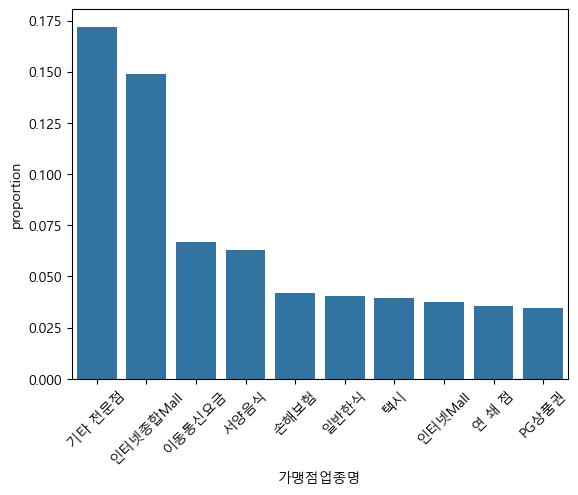

In [36]:
import seaborn as sns

# 인터넷P/G를 제외한 데이터만 필터링
total_data2 = total_data[total_data['가맹점업종명'] != '인터넷P/G']

# 확인을 위해 업종별 비율 다시 확인
sns.barplot(total_data2['가맹점업종명'].value_counts(normalize=True).head(10))
plt.xticks(rotation = 45)